## [Accept-Reject Sampling](https://www.youtube.com/watch?v=OXDqjdVVePY)

* Sample from a PDF of a distribution $p(s)$ where $p(s) = \frac{f(s)}{NC}$ and $NC = \int_{-\infty}^{\infty} f(s) ds$ where $f(s)$ is numerator function and $NC$ the (often) intractable normalizing constant
* No need to know the CDF or the full PDF (often numerator known, but not normalizing constant)
* Accept-Reject Sampling
    * Choose another simplier distribution $g(s)$ that is "close" (similar in shape) to $p(s)$ and easy to sample from
    * Scale $g(s)$ by a factor $M$ such that $M*g(s)$ is always above $f(s)$
    * Sample $s \sim g(s)$ and accept $s$ with the prob. of $P(A) = \frac{f(s)}{M*g(s)}$
    * The accepted samples $s$ resembles samples from the $p(s)$

* Why are the accepted samples $s \sim g(s)$ equal to samples from the intractable $p(s)$?
    * Mathematical Proof: $s$ being the sample, $A$ being the event of accepting a sample, $D(x)$ denoting the density function
    
        \begin{align}
            D(s|A) &= \frac{P(A|s)D(s)}{P(A)} &= \frac{\frac{f(s)}{M*g(s)} * g(s)}{P(A)} &= \frac{\frac{f(s)}{M*g(s)} * g(s)}{\int_{-\infty}^{\infty} g(s)*\frac{f(s)}{M*g(s)}}\\
            &= \frac{\frac{f(s)}{M*g(s)} * g(s)}{\frac{1}{M} * \int_{-\infty}^{\infty} f(s) ds} &= \frac{\frac{f(s)}{M*g(s)} * g(s)}{\frac{1}{M} * NC} &= \frac{\frac{f(s)}{M}}{\frac{NC}{M}} \\
            &= \frac{f(s)}{M} * \frac{M}{NC} \\
            &= \frac{f(s)}{NC} 
            &= p(s)\\
        \end{align}

    * Intuitive Explanation: the acceptance probability depends on the ratio $\frac{f(s)}{g(s)}$ which is high when $f(s)$ is high and $g(s)$ is low
        * $f(s)$ is proportional to $p(s)$, so a large $f(s)$ will also result in a high prob. of $p(s)$ => $s$ is very likely in $p(s)$
        * $g(s)$ describes the rarity of a $s$, so if $g(s)$ is very small, it´s a very rare sample with a high prob. of being in $p(s)$  according to our ratio, thus we will accept the sample
        * $M$ is just a normalizing constant, allowing for interpretation as a probability
    
    $\rightarrow$ $\frac{f(s)}{g(s)}$ will be very high for common samples of $p(s)$ but rarily proposed by $g(s)$, vice-versa the ratio will be very low for uncommon samples of $p(s)$ that are commonly proposed by $g(s)$

# Markov Chain Monte Carlo (MCMC) Example

MCMC are a type of sampling technique that allows for sampling implicitly from a target complex distribution (e.g. an intractable posterior distribution). The idea is to make use of first order markov chain (allow for correlation between samples) to approximate the intractable distribution $p_{\theta}(x)$ by sampling multiple iterations until the samples resemble samples from $p_{\theta}(x)$. The first "bad" samples are discarded, this is also called the "burn-in" phase. All samples after the "burn-in" phase are samples from $p_{\theta}(x)$, allowing for sampling without computing $p_{\theta}(x)$.

There are multiple ways of doing MCMC sampling, e.g. Metropolis-Hastings, Gibbs Sampling.

## [Markov Stationary Distribution](https://www.youtube.com/watch?v=4sXiCxZDrTU&list=WL&index=5)

* A stationary distribution is a set of state transition probabilities between all these states, where the probability stays the same over multiple Iterations
    * $\pi = [\pi_1, \pi_2, ..., \pi_n]$ for $n$ different states in the markov chain, where $\pi_n$ describes the transition prob. of the current state to state $n$
    * $\sum_n \pi_n = 1$ (this makes it a distribution) and $P(X_{t+1} = S) = P(X_{t} = S)$ (transition probabilities $S$ stays the same with increasing timestep $t$)
* Computation simplified as finding the left eigenvector of transition Matrix $P$ with eigenvalue 1:
    * $\pi * P = \pi$ with $\pi \in \mathbb{R}^n$ and $P \in \mathbb{R}^{n \times n}$ (dot product of prob. of being in state $n$ in current $t$ with transition prob. of being in state $n$ in $t+1$)
* There is no guarantee that one will arrive at a stationary distribution, if the markov chain runs long enough (convergence not guaranteed)
* There are multiple stationary distributions (not unique!)

## MCMC Sampling Methods
### [Metroplis Hastings](https://www.youtube.com/watch?v=yCv2N7wGDCw&list=WL&index=12)
### [Gibbs Sampling](https://www.youtube.com/watch?v=7LB1VHp4tLE)

Following Code Example is based on: https://github.com/ritvikmath/YouTubeVideoCode/blob/main/MCMC%20Experiments.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
# function for numerator of target distribution
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else:
        return np.exp((x-1)/3) + np.exp((x-1)**3)

# normal PDF
def g(x, mu, sigma):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

## Draw Target Distribution

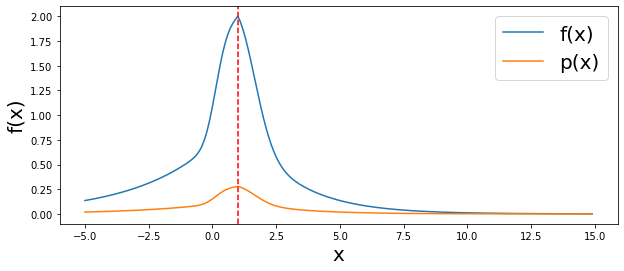

In [10]:
NORM_CONST = 7.16556 #this is usally unknown for us, since it is the hard part to compute in bayesian inference

x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')
